<a href="https://colab.research.google.com/github/realpranav93/EVA-projects/blob/master/session6/Assignment_6a_pranav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


In [0]:
train_features.shape
img_cols
num_classes

10

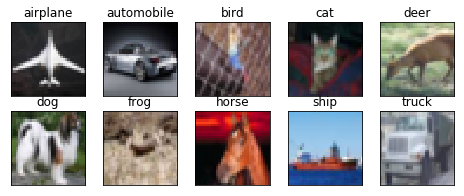

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) - 3x3, 48c, 32x32
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) - 5x5,48c, 30x30
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) - 10x10,48, 15x15
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) - 12x12, 96c,15x15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) - 14x14, 96c, 13x13
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) - 28x28, 96c, 6x6
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) - 30x30, 192c, 6x6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) - 32x32, 192c, 4x4
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) - 32x32, 192c, 2x2
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 12s 32ms/step - loss: 1.8585 - acc: 0.2882 - val_loss: 1.5287 - val_acc: 0.4213
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3675 - acc: 0.5044 - val_loss: 1.1416 - val_acc: 0.5917
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1359 - acc: 0.5972 - val_loss: 0.9846 - val_acc: 0.6504
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9858 - acc: 0.6557 - val_loss: 0.8902 - val_acc: 0.6922
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8849 - acc: 0.6931 - val_loss: 0.8382 - val_acc: 0.7000
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.8101 - acc: 0.7249 - val_loss: 0.7913 - val_acc: 0.7327
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7541 - acc: 0.7391 - val_loss: 0.6816 - val_acc: 0.7688
Epoch 8/100
390/390 [==============================] - 9s 23m

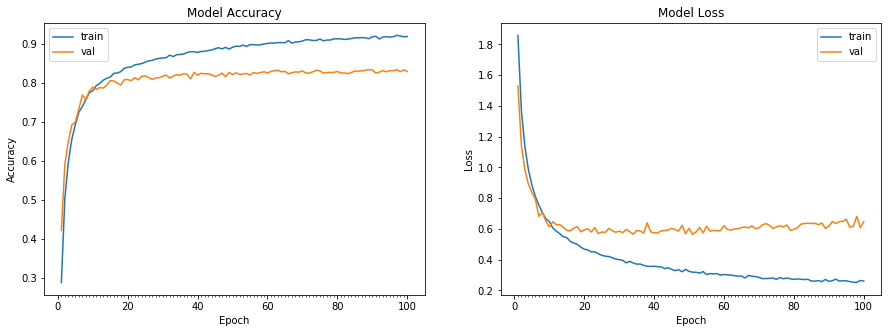

Accuracy on test data is: 82.93


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Defining new model with changes as per the assignment
---



In [0]:
model2 = Sequential()
model2.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # 3x3, 48c, 32x32
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Convolution2D(48, 3, 3,border_mode = 'same')) # 5x5,48c, 32x32
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 10x10,48c, 16x16
model2.add(Dropout(0.25))



model2.add(Convolution2D(24, 1, 1)) # 10x10, 24c,16x16
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Convolution2D(96, 3, 3,border_mode='same')) # 12x12, 96c, 16x16
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2))) # 24x24, 96c, 8x8
model2.add(Dropout(0.25))



model2.add(Convolution2D(48, 1, 1))# 26x26, 48c, 8x8
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Convolution2D(192, 3, 3, border_mode='same')) # 28x28, 192c, 8x8
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))


model2.add(Convolution2D(10,1,1)) # 28x28, 10c, 8x8
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Convolution2D(10, 8, 8)) # 32x32, 192c, 1x1

model2.add(Flatten())
model2.add(Activation('softmax'))
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), pa

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 48)        20784     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 48)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=90)`
  if sys.path[0] == '':


Epoch 1/90
390/390 [==============================] - 12s 31ms/step - loss: 1.4856 - acc: 0.4633 - val_loss: 1.3170 - val_acc: 0.5449
Epoch 2/90
390/390 [==============================] - 11s 27ms/step - loss: 1.0981 - acc: 0.6095 - val_loss: 1.1357 - val_acc: 0.6093
Epoch 3/90
390/390 [==============================] - 11s 27ms/step - loss: 0.9353 - acc: 0.6711 - val_loss: 1.0226 - val_acc: 0.6483
Epoch 4/90
390/390 [==============================] - 11s 27ms/step - loss: 0.8309 - acc: 0.7064 - val_loss: 0.9228 - val_acc: 0.6817
Epoch 5/90
390/390 [==============================] - 11s 27ms/step - loss: 0.7672 - acc: 0.7287 - val_loss: 0.8799 - val_acc: 0.6873
Epoch 6/90
390/390 [==============================] - 11s 27ms/step - loss: 0.7137 - acc: 0.7509 - val_loss: 0.7803 - val_acc: 0.7332
Epoch 7/90
390/390 [==============================] - 11s 28ms/step - loss: 0.6731 - acc: 0.7627 - val_loss: 0.7239 - val_acc: 0.7503
Epoch 8/90
390/390 [==============================] - 11s 28ms

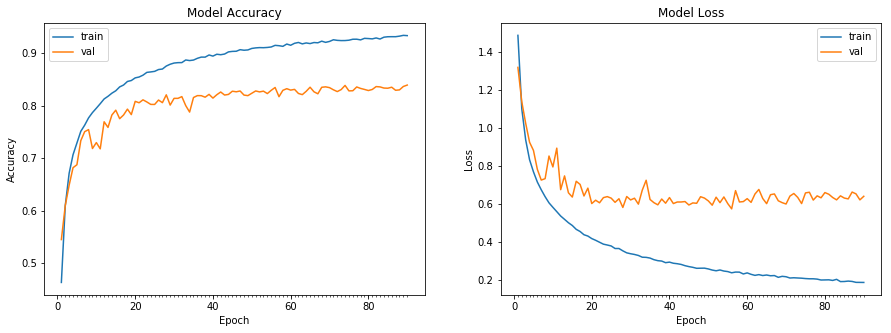

Accuracy on test data is: 83.90


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 90, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model2))